Create an “Academic performance” dataset of students and perform the following operations using
Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques
to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to decrease
the skewness and convert the distribution into a normal distribution.
Reason and document your approach properly.

## 1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.

In [1]:
import pandas as pd
import numpy as np

In [2]:
stud = pd.read_csv('../../Datasets/student.csv')

In [3]:
stud.head()

,Roll No,Name,Gender,Sem1,Sem2,Sem3,Sem4,average Score
0,1,Aditya,M,75.0,10.0,78.0,95.0,64.5
1,2,Priti,F,78.0,76.0,78.0,76.0,77.0
2,3,Arjun,M,7.0,95.0,98.0,90.0,72.5
3,4,Bheem,M,88.0,68.0,78.0,80.0,78.5
4,5,Raju,M,25.0,69.0,NaN,70.0,41.0


In [4]:
sems = ['Sem1','Sem2','Sem3','Sem4']
stud[sems].head()

,Sem1,Sem2,Sem3,Sem4
0,75.0,10.0,78.0,95.0
1,78.0,76.0,78.0,76.0
2,7.0,95.0,98.0,90.0
3,88.0,68.0,78.0,80.0
4,25.0,69.0,NaN,70.0


### Filling missing values

In [5]:
# checking for missing values
stud.isna().sum()

Roll No          0
Name             0
Gender           0
Sem1             2
Sem2             2
Sem3             2
Sem4             3
average Score    0
dtype: int64

Only sems columns has missing values

In [6]:
# method 1: filling missing values with mean

filled_na_with_mean = stud.fillna(stud[sems].mean())

In [7]:
stud[sems].mean()

Sem1    70.392857
Sem2    76.214286
Sem3    78.285714
Sem4    77.296296
dtype: float64

In [8]:
stud[  stud[sems].isna().any(axis=1)  ]

,Roll No,Name,Gender,Sem1,Sem2,Sem3,Sem4,average Score
4,5,Raju,M,25.0,69.0,NaN,70.0,41.000000
6,7,Gayatri,F,71.0,NaN,9.0,49.0,43.000000
11,12,Kavya,F,65.0,64.0,86.0,NaN,71.666667
13,14,Ashwini,F,NaN,61.0,48.0,23.0,44.000000
16,17,Tina,F,51.0,84.0,84.0,NaN,73.000000
17,18,Ganesh,M,26.0,87.0,NaN,42.0,51.666667
22,23,Niraj,M,45.0,84.0,38.0,NaN,55.666667
24,25,Rudra,M,NaN,56.0,68.0,586.0,236.666667
29,30,Chintu,M,24.0,NaN,65.0,45.0,44.666667


In [9]:
filled_na_with_mean.isna().sum()

Roll No          0
Name             0
Gender           0
Sem1             0
Sem2             0
Sem3             0
Sem4             0
average Score    0
dtype: int64

In [10]:
# method 2: filling missing values with median

filled_na_with_median = stud.fillna(stud[sems].median())

In [11]:
stud[sems].median()

Sem1    56.5
Sem2    68.5
Sem3    75.0
Sem4    68.0
dtype: float64

In [12]:
filled_na_with_median.isna().sum()

Roll No          0
Name             0
Gender           0
Sem1             0
Sem2             0
Sem3             0
Sem4             0
average Score    0
dtype: int64

In [13]:
# method 3: filling missing values with string 'missing'

filled_na_with_str = stud.fillna('missing')

In [14]:
filled_na_with_str.isna().sum()

Roll No          0
Name             0
Gender           0
Sem1             0
Sem2             0
Sem3             0
Sem4             0
average Score    0
dtype: int64

### Removing Inconsistencies

In [15]:
stud_without_inc = stud[((stud[sems]>=0) & (stud[sems]<=100)).all(axis=1)]
stud_without_inc

,Roll No,Name,Gender,Sem1,Sem2,Sem3,Sem4,average Score
0,1,Aditya,M,75.0,10.0,78.0,95.0,64.50
1,2,Priti,F,78.0,76.0,78.0,76.0,77.00
2,3,Arjun,M,7.0,95.0,98.0,90.0,72.50
3,4,Bheem,M,88.0,68.0,78.0,80.0,78.50
5,6,Gaurav,M,88.0,67.0,98.0,87.0,85.00
7,8,Swar,M,15.0,48.0,87.0,68.0,54.50
8,9,Rupesh,M,35.0,57.0,78.0,59.0,57.25
12,13,Priya,F,73.0,63.0,87.0,69.0,73.00
15,16,Achal,F,48.0,98.0,84.0,46.0,69.00
18,19,Suyam,M,45.0,35.0,54.0,84.0,54.50


## 2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.

In [16]:
import seaborn as sns

<Axes: >

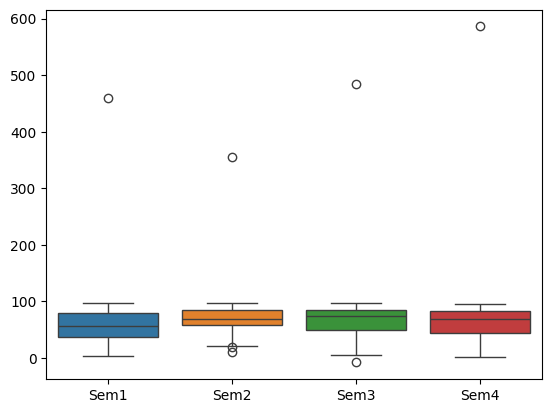

In [17]:
sns.boxplot(stud[sems])

In [18]:
def get_outliers(df):
    z_scores = (df[sems] - df[sems].mean())/df[sems].std()
    mask = z_scores[(z_scores > 2.5) | (z_scores < -2.5)].any(axis=1)
    return df[mask]

In [19]:
outliers = get_outliers(stud)

In [20]:
outliers

,Roll No,Name,Gender,Sem1,Sem2,Sem3,Sem4,average Score
9,10,Nisha,F,459.0,59.0,45.0,79.0,160.500000
10,11,Rucha,F,87.0,356.0,90.0,58.0,147.750000
24,25,Rudra,M,NaN,56.0,68.0,586.0,236.666667
28,29,Sham,M,38.0,75.0,485.0,84.0,170.500000


<Axes: >

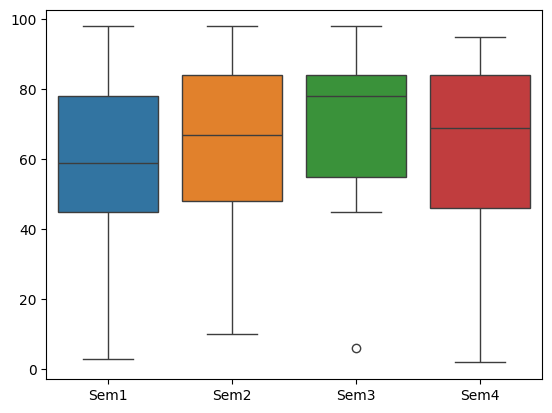

In [21]:
sns.boxplot(stud_without_inc[sems])

In [22]:
new_outliers= get_outliers(stud_without_inc)
new_outliers

,Roll No,Name,Gender,Sem1,Sem2,Sem3,Sem4,average Score
26,27,Nikesh,M,45.0,19.0,6.0,2.0,20.5


In [53]:
filtered_data = stud_without_inc[~stud_without_inc.index.isin(new_outliers.index)]
filtered_data

,Roll No,Name,Gender,Sem1,Sem2,Sem3,Sem4,average Score
0,1,Aditya,M,75.0,10.0,78.0,95.0,64.50
1,2,Priti,F,78.0,76.0,78.0,76.0,77.00
2,3,Arjun,M,7.0,95.0,98.0,90.0,72.50
3,4,Bheem,M,88.0,68.0,78.0,80.0,78.50
5,6,Gaurav,M,88.0,67.0,98.0,87.0,85.00
7,8,Swar,M,15.0,48.0,87.0,68.0,54.50
8,9,Rupesh,M,35.0,57.0,78.0,59.0,57.25
12,13,Priya,F,73.0,63.0,87.0,69.0,73.00
15,16,Achal,F,48.0,98.0,84.0,46.0,69.00
18,19,Suyam,M,45.0,35.0,54.0,84.0,54.50


## 3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution. Reason and document your approach properly.

In [52]:
from sklearn.preprocessing import Normalizer

In [57]:
norm = Normalizer()
filtered_data[sems + ['average Score']] = norm.fit_transform(filtered_data[sems + ['average Score']])

C:\Users\Himanshu\AppData\Local\Temp\ipykernel_3384\1474957762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[sems + ['average Score']] = norm.fit_transform(filtered_data[sems + ['average Score']])


In [58]:
filtered_data

,Roll No,Name,Gender,Sem1,Sem2,Sem3,Sem4,average Score
0,1,Aditya,M,0.474396,0.063253,0.493372,0.600902,0.407981
1,2,Priti,F,0.452991,0.441376,0.452991,0.441376,0.447183
2,3,Arjun,M,0.039110,0.530782,0.547544,0.502846,0.405071
3,4,Bheem,M,0.499692,0.386125,0.442908,0.454265,0.445748
5,6,Gaurav,M,0.459789,0.350066,0.512037,0.454564,0.444114
7,8,Swar,M,0.112772,0.360869,0.654075,0.511231,0.409737
8,9,Rupesh,M,0.265973,0.433156,0.592739,0.448354,0.435055
12,13,Priya,F,0.444618,0.383711,0.529887,0.420255,0.444618
15,16,Achal,F,0.298598,0.609637,0.522546,0.286156,0.429234
18,19,Suyam,M,0.353638,0.275052,0.424366,0.660124,0.428295
